In [1]:
pip install Pyarrow statsmodels scikit-learn 

  Using cached https://files.pythonhosted.org/packages/00/bd/4c03789f723337723670e8cf8935b18e170e7af3813ec38e71d2cfb0bd93/pyarrow-12.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: '/opt/conda/envs/dsua-111/lib/python3.7/site-packages/pyarrow'

Note: you may need to restart the kernel to use updated packages.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
df = pd.read_csv("states_data.csv")
vep12_turnout = df["vep12_turnout"]
prcapinc = df["prcapinc"]

In [55]:
#1a

def my_standardize(n):
    standardizedArray = np.zeros_like(n, dtype=float)
    mean = np.mean(n)
    standardDeviation = np.std(n)
    for i in range(len(n)):
        z = (n[i] - mean)/standardDeviation
        standardizedArray[i] = z
    return standardizedArray
    

Text(0.5, 1.0, 'standardized prcapinc vs vep12_turnout')

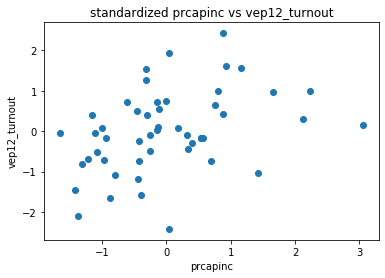

In [56]:
#1b
vep12_turnout_standard = my_standardize(vep12_turnout)
prcapinc_standard = my_standardize(prcapinc)
plt.scatter(prcapinc_standard,vep12_turnout_standard)
plt.xlabel("prcapinc") 
plt.ylabel("vep12_turnout")
plt.title("standardized prcapinc vs vep12_turnout")

Text(0.5, 1.0, 'unstandardized prcapinc vs vep12_turnout')

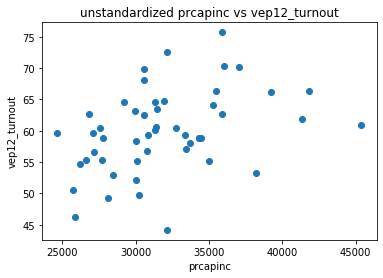

In [57]:
#1b
plt.scatter(prcapinc,vep12_turnout)
plt.xlabel("prcapinc") 
plt.ylabel("vep12_turnout")
plt.title("unstandardized prcapinc vs vep12_turnout")

#1c
The data points on both scatterplots look the same relatively to other points, they are just on different scales. The standardized scatterplot makes it easier to compare beccause the mean is 0 and standard dviation is 1

In [59]:
#1d
    
#def my_corr(x,y):
    #data = pd.DataFrame({x: df[x], y: df[y]})
    #r = data.corr(method='pearson')
    #return r

def my_corr(x,y):
    standardize_x = my_standardize(x)
    standardize_y = my_standardize(y)
    correlation = np.mean(standardize_x* standardize_y)
    return correlation

def gen_data():
    m0, m1, v0, v1 = np.random.uniform(-5, 5, 4)
    x = np.random.normal(m0, v0**2, 100)
    y = np.random.normal(m1, v1**2, 100)
    return x, y
    
def test_corr(my_corr):
    for _ in range(100):
        x, y = gen_data()
        if not np.isclose(np.corrcoef(x,y)[0, 1], my_corr(x, y)):
            return False
    return True

test_corr(my_corr)

True

In [64]:
#1e
print(my_corr(prcapinc,vep12_turnout))
#age_income_corr = df['prcapinc'].corr(df['vep12_turnout'])
#age_income_corr

0.39054295261645455


0.39054295261645455

There is a positive relationship with pearson correlation coefficient of 0.39 between mean income per capita and the voter 
turnout rate in the 2012 presidential election.
States that have higher mean income per capita are more likely to have a higher voter turnout.

#1f 
No you can't conclude that people with higher incomes are more likely to vote because correlation does not imply causation. Other factors can influence the voter turnout.

In [65]:
#2a
def my_slope(x, y):
    standardize_x = np.sum((x - np.mean(x)) * (y - np.mean(y)))
    standardize_y = np.sum((x - np.mean(x)) ** 2)
    slope = standardize_x / standardize_y
    return slope

my_slope(prcapinc,vep12_turnout)

0.0005735134590888056

In [66]:
#2b
def my_intercept(x, y):
    intercept = np.mean(y) - my_slope(x, y)*np.mean(x)
    return intercept

my_intercept(prcapinc,vep12_turnout)

def test_reg(my_intercept, my_slope):
    for _ in range(100):
        u, v = gen_data()
        X = np.transpose(np.vstack([np.repeat(1.0, len(u)), u]))
        a, b = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), v)
        if not np.isclose(b, my_slope(u, v)):
            return False
        if not np.isclose(a, my_intercept(u, v)):
            return False
    return True

test_reg(my_intercept, my_slope)

True

In [11]:
#2c
print("This is the slope", my_slope(prcapinc,vep12_turnout))
print("This is the intercept", my_intercept(prcapinc,vep12_turnout))

This is the slope 0.0005735134590888056
This is the intercept 41.61161411730767


#2d 
Slope: Indicates the average increase in voter turnout (vep12_turnout) is 0.0005735134590888056 for each dollar increase in mean income per capita (prcapinc).
Intercept: Represents the expected value of vep12_turnout equals 41.61161411730767 when prcapinc is 0. While the intercept can provide insights into the data, it might not always have a meaningful interpretation, especially if a prcapinc of 0 is not plausible.

In [67]:
#2e 
def predict_reg(b, a, x):
    y = b*x + a
    return y



In [68]:
#2f 
print("This is the voter turnout rate for mean per capita of $15000", predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 15000))
print("This is the voter turnout rate for mean per capita of $25000", predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 25000))
print("This is the voter turnout rate for mean per capita of $30000", predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 30000))


This is the voter turnout rate for mean per capita of $15000 50.21431600363975
This is the voter turnout rate for mean per capita of $25000 55.949450594527804
This is the voter turnout rate for mean per capita of $30000 58.81701788997184


Text(0.5, 1.0, 'unstandardized prcapinc vs vep12_turnout')

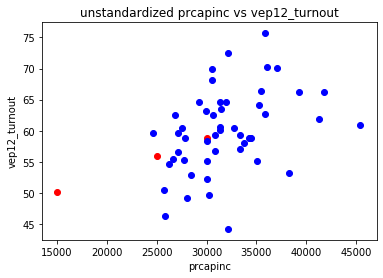

In [69]:
#2g
point1 = predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 15000)
point2 = predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 25000)
point3 = predict_reg(my_slope(prcapinc,vep12_turnout), my_intercept(prcapinc,vep12_turnout), 30000)

plt.scatter([15000, 25000, 30000], [point1, point2, point3], color='red')
plt.scatter(prcapinc,vep12_turnout, color='blue')
plt.xlabel("prcapinc") 
plt.ylabel("vep12_turnout")
plt.title("unstandardized prcapinc vs vep12_turnout")

#2h
They are close to the observed data. The prediction is trust worthy, although we need to consider that 1 point in the added data is outside the range of the observed prcapinc, thus that point might not be a reliable extrapolated point.

In [71]:
#3a 
import pandas as pd
dataframe = pd.read_csv("shared/data/credit_risk_dataset.csv")
missing_values = dataframe.isna().sum()
missing_values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [72]:
columns_with_nas = missing_values[missing_values > 0].index.tolist()
credit_risk_df_clean = dataframe.dropna()
credit_risk_df_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [73]:
#3b
subset_dataframe = credit_risk_df_clean[["person_age", "person_income", "loan_amnt", "loan_percent_income", "cb_person_cred_hist_length"]]
subset_dataframe

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
0,22,59000,35000,0.59,3
1,21,9600,1000,0.10,2
2,25,9600,5500,0.57,3
3,23,65500,35000,0.53,2
4,24,54400,35000,0.55,4
...,...,...,...,...,...
32576,57,53000,5800,0.11,30
32577,54,120000,17625,0.15,19
32578,65,76000,35000,0.46,28
32579,56,150000,15000,0.10,26


In [74]:
#3c
age_income_corr = subset_dataframe['person_age'].corr(subset_dataframe['person_income'])
print(age_income_corr)
age_loan_amnt_corr = subset_dataframe['person_age'].corr(subset_dataframe['loan_amnt'])
print(age_loan_amnt_corr)
subset_dataframe.corr()


0.17889881272956354
0.054171705444567966


,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.178899,0.054172,-0.041065,0.859544
person_income,0.178899,1.000000,0.265879,-0.251511,0.117076
loan_amnt,0.054172,0.265879,1.000000,0.577399,0.045294
loan_percent_income,-0.041065,-0.251511,0.577399,1.000000,-0.030080
cb_person_cred_hist_length,0.859544,0.117076,0.045294,-0.030080,1.000000


The correlation coefficient between a person's age and their income is 0.1788, meaning that the older the person, their expected income would likely be higher.
The highest correlated predictors are a person's age and their credit history length, which makes sense as the older one is, the longer their credit history is.
The least correlated predictors are loan_percent_income and a person's credit history length, because the coefficient is closest to 0, as the amount of loan relatively to their income, and their credit history length are barely related to each other.
These correlations do make sense.

Text(0.5, 1.0, 'person_income vs loan_amnt')

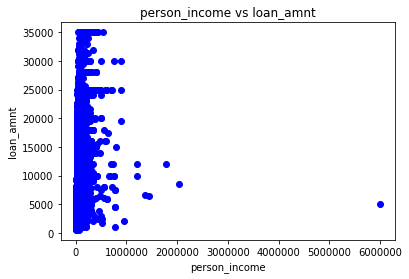

In [75]:
#3d
person_income = subset_dataframe['person_income']
loan_amnt = subset_dataframe['loan_amnt']
plt.scatter(person_income,loan_amnt, color='blue')
plt.xlabel("person_income") 
plt.ylabel("loan_amnt")
plt.title("person_income vs loan_amnt")

#3e
(i) There is 1 outlier, where the income is 6000000 and the loan amount is around 6000
(ii) We can do a log transformation, it would reduce the effect of outliers.


,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length
0,22,59000,35000,0.59,3
1,21,9600,1000,0.10,2
2,25,9600,5500,0.57,3
3,23,65500,35000,0.53,2
4,24,54400,35000,0.55,4
...,...,...,...,...,...
32576,57,53000,5800,0.11,30
32577,54,120000,17625,0.15,19
32578,65,76000,35000,0.46,28
32579,56,150000,15000,0.10,26


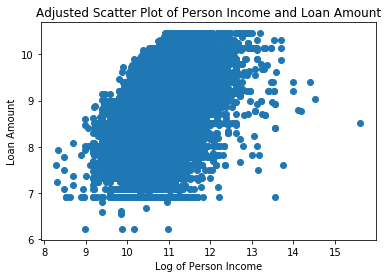

In [76]:
#(iii)
person_income_log = np.log(subset_dataframe['person_income'])
loan_amnt_log = np.log(subset_dataframe['loan_amnt'])
plt.scatter(person_income_log, loan_amnt_log)
plt.xlabel('Log of Person Income')
plt.ylabel('Loan Amount')
plt.title('Adjusted Scatter Plot of Person Income and Loan Amount')
subset_dataframe

In [80]:
#(iv)
subset_dataframe['person_income_log'] = person_income_log
subset_dataframe['loan_amnt_log'] = loan_amnt_log
subset_dataframe_log = subset_dataframe[["person_age", "person_income_log", "loan_amnt_log", "loan_percent_income", "cb_person_cred_hist_length"]]
subset_dataframe_log


/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,person_age,person_income_log,loan_amnt_log,loan_percent_income,cb_person_cred_hist_length
0,22,10.985293,10.463103,0.59,3
1,21,9.169518,6.907755,0.10,2
2,25,9.169518,8.612503,0.57,3
3,23,11.089805,10.463103,0.53,2
4,24,10.904119,10.463103,0.55,4
...,...,...,...,...,...
32576,57,10.878047,8.665613,0.11,30
32577,54,11.695247,9.777074,0.15,19
32578,65,11.238489,10.463103,0.46,28
32579,56,11.918391,9.615805,0.10,26


In [81]:
#3f
subset_dataframe_log.corr()

,person_age,person_income_log,loan_amnt_log,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.129546,0.048331,-0.041065,0.859544
person_income_log,0.129546,1.000000,0.408926,-0.376167,0.101253
loan_amnt_log,0.048331,0.408926,1.000000,0.606014,0.039944
loan_percent_income,-0.041065,-0.376167,0.606014,1.000000,-0.030080
cb_person_cred_hist_length,0.859544,0.101253,0.039944,-0.030080,1.000000


In [90]:
subset_dataframe_log

,person_age,person_income_log,loan_amnt_log,loan_percent_income,cb_person_cred_hist_length
0,22,10.985293,10.463103,0.59,3
1,21,9.169518,6.907755,0.10,2
2,25,9.169518,8.612503,0.57,3
3,23,11.089805,10.463103,0.53,2
4,24,10.904119,10.463103,0.55,4
...,...,...,...,...,...
32576,57,10.878047,8.665613,0.11,30
32577,54,11.695247,9.777074,0.15,19
32578,65,11.238489,10.463103,0.46,28
32579,56,11.918391,9.615805,0.10,26


In [89]:
subset_dataframe

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_income_log
0,22,59000,35000,0.59,3,10.985293
1,21,9600,1000,0.10,2,9.169518
2,25,9600,5500,0.57,3,9.169518
3,23,65500,35000,0.53,2,11.089805
4,24,54400,35000,0.55,4,10.904119
...,...,...,...,...,...,...
32576,57,53000,5800,0.11,30,10.878047
32577,54,120000,17625,0.15,19,11.695247
32578,65,76000,35000,0.46,28,11.238489
32579,56,150000,15000,0.10,26,11.918391


The correlation coefficient of person_income and loan_amount when using log transformation is 0.4089, which is higher than before transformation. Outliers can have a lot of influence on the correlation coefficient between 2 predictors, but transformation can help reducing the influence of outliers.

In [82]:
#3g
subset_dataframe['person_income_updated'] = subset_dataframe['person_income'] + 10000
subset_dataframe['loan_amnt_updated'] = subset_dataframe['loan_amnt'] - 5000

subset_dataframe

/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/envs/dsua-111/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_income_log,loan_amnt_log,person_income_updated,loan_amnt_updated
0,22,59000,35000,0.59,3,10.985293,10.463103,69000,30000
1,21,9600,1000,0.10,2,9.169518,6.907755,19600,-4000
2,25,9600,5500,0.57,3,9.169518,8.612503,19600,500
3,23,65500,35000,0.53,2,11.089805,10.463103,75500,30000
4,24,54400,35000,0.55,4,10.904119,10.463103,64400,30000
...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,0.11,30,10.878047,8.665613,63000,800
32577,54,120000,17625,0.15,19,11.695247,9.777074,130000,12625
32578,65,76000,35000,0.46,28,11.238489,10.463103,86000,30000
32579,56,150000,15000,0.10,26,11.918391,9.615805,160000,10000


In [83]:
#3g
corr = subset_dataframe.corr()

print(corr)
subset_dataframe

                            person_age  person_income  loan_amnt  \
person_age                    1.000000       0.178899   0.054172   
person_income                 0.178899       1.000000   0.265879   
loan_amnt                     0.054172       0.265879   1.000000   
loan_percent_income          -0.041065      -0.251511   0.577399   
cb_person_cred_hist_length    0.859544       0.117076   0.045294   
person_income_log             0.129546       0.699905   0.423650   
loan_amnt_log                 0.048331       0.236073   0.915293   
person_income_updated         0.178899       1.000000   0.265879   
loan_amnt_updated             0.054172       0.265879   1.000000   

                            loan_percent_income  cb_person_cred_hist_length  \
person_age                            -0.041065                    0.859544   
person_income                         -0.251511                    0.117076   
loan_amnt                              0.577399                    0.045294   
loa

,person_age,person_income,loan_amnt,loan_percent_income,cb_person_cred_hist_length,person_income_log,loan_amnt_log,person_income_updated,loan_amnt_updated
0,22,59000,35000,0.59,3,10.985293,10.463103,69000,30000
1,21,9600,1000,0.10,2,9.169518,6.907755,19600,-4000
2,25,9600,5500,0.57,3,9.169518,8.612503,19600,500
3,23,65500,35000,0.53,2,11.089805,10.463103,75500,30000
4,24,54400,35000,0.55,4,10.904119,10.463103,64400,30000
...,...,...,...,...,...,...,...,...,...
32576,57,53000,5800,0.11,30,10.878047,8.665613,63000,800
32577,54,120000,17625,0.15,19,11.695247,9.777074,130000,12625
32578,65,76000,35000,0.46,28,11.238489,10.463103,86000,30000
32579,56,150000,15000,0.10,26,11.918391,9.615805,160000,10000


The correlation coefficient between person_income_updated and loan_amnt_updated is 0.265879, which is the same as when we have not added 10000 to the income and subtracted 5000 to the loan. This occurs because the shape of the relationship between the two variables doesn't change. All points on the scatter plot are moved the same distance in the same direction, which affects neither the slope of the line that would be fitted through them in a linear regression.

In [84]:
#4a
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
df = pd.read_csv("states_data.csv")

results = smf.ols('vep12_turnout ~ prcapinc', data=df).fit()
print(results.summary())

print("the value of the slope coefficient is 0.0006")
print("the value of T-statistics is 2.939")
print("the value of p-value is 0.005")

                            OLS Regression Results                            
Dep. Variable:          vep12_turnout   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     8.639
Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00505
Time:                        02:41:57   Log-Likelihood:                -160.15
No. Observations:                  50   AIC:                             324.3
Df Residuals:                      48   BIC:                             328.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6116      6.293      6.612      0.0

The slope estimate agrees with my estimate from question 2, because 0.0005735134590888056 can be rounded up to 0.0006

#4b
The null hypothesis is that there is no relationship between the mean income per capita in each state and the turnout in the 2012 election. (prcapinc ~ vep12_turnout)

4c we can reject the null hypothesis because the p-value is significantly smaller than the signifcance level. There is a relationship between the mean income per capita in each state and the turnout in the 2012 election.

In [27]:
#4d
results = smf.ols('vep12_turnout ~ prcapinc + pop2010 + college + unemploy + urban', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          vep12_turnout   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.658
Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00745
Time:                        02:09:55   Log-Likelihood:                -155.59
No. Observations:                  50   AIC:                             323.2
Df Residuals:                      44   BIC:                             334.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.7996      8.742      4.438      0.0

4e The slope coefficient for prcapinc has changed compared to the value obtained in (a). T-statistic and p-value also change, it means that prcapinc effect on voter turnout is confounded by other factors. So the second model, which is multiple regression, likely offers more accuracy and reliability than the first model.

4f in (a) R-squared is 0.153 (approximately 15.3% of the variance in voter turnout can be explained by per capita income alone) and in (d) R-squared is 0.294 (approximately 29.4% of the variance in voter turnout can be explained by per capita income alone). R-squared in (d) is greater. It is an expected outcome because adding relevant variables to a regression model increases R-squared because more factors that can influence the dependent variable are being considered. Voter turnout is influenced by multiple factors, more than just income.

In [85]:
#4g
Y = df[["vep12_turnout"]]
X = df[["prcapinc", "pop2010", "college", "unemploy", "urban"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2023)
X_test


,prcapinc,pop2010,college,unemploy,urban
34,31322,11536504,22.9,6.3,77.4
35,28089,3751351,21.9,4.9,65.3
9,30051,9687653,25.7,4.7,71.6
2,25725,2915918,19.1,5.9,52.5
21,31954,9883640,24.3,7.0,74.7
12,27098,1567582,24.0,5.3,66.4
38,33733,1052567,29.1,5.4,90.9
10,32160,1360301,28.2,3.4,91.5
42,30222,25145561,24.5,6.0,82.5
19,39247,5773552,34.5,4.2,86.1


In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'predicted value vs Residuals')

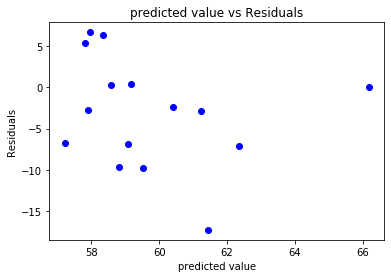

In [88]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.xlabel("predicted value") 
plt.ylabel("Residuals")
plt.title("predicted value vs Residuals")

In [89]:
from sklearn.metrics import mean_squared_error

print(f"R-squared: {metrics.r2_score(y_test, y_pred):.3f}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.3f}")
print(f"MAE: {metrics.median_absolute_error(y_test, y_pred):.3f}")

R-squared: -0.270
MSE: 50.962
MAE: 6.341


There is no problem with the model, as there is no apparent pattern. It means that the model does not systematically miss any trends in the data.